여러분이 선호하는 데이터셋을 선정해주세요

이 데이터셋에 대한 여러 가설을 세워주세요.

가설을 증명하기 위한 여러 데이터 분석 / 시각화를 진행해주세요.

고객이 자동차를 구입했는지 여부를 나타내는 구매 결정 데이터 세트의 csv


가설 1: 30-40대 남성이 구매확률이 높다.
    
가설 2: 연봉이 높을 수록 자동차 구매확률이 높다.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./car_data.csv')
data

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


### 가설 1. 30-40대 남성이 구매 확률이 높다.

In [5]:
data.sort_values(by = 'Age')

,User ID,Gender,Age,AnnualSalary,Purchased
628,300,Female,18,68000,0
627,632,Female,18,86000,0
108,511,Female,18,44000,0
587,717,Male,18,82000,0
772,580,Male,18,52000,0
...,...,...,...,...,...
622,18,Male,63,44500,1
424,880,Male,63,36500,1
161,973,Female,63,110500,1
972,440,Male,63,85500,1


In [34]:
# 10년을 기준으로 Age를 바탕으로 연령대를 구분한다.

bins = [17, 29, 39, 49, 62] 
Age_category = ['18~29', '30-39', '40-49','50-63']

data['Age_Category'] = pd.cut(data['Age'], bins=bins, labels=Age_category)

# 성별과 연령대에 따라서 groupby를 하여 평균(구매확률)을 구한다.
data.groupby(['Gender', 'Age_Category']).mean()[['Purchased']]*100

Purchased
Gender Age_Category           
Female 18~29          4.166667
       30-39         22.302158
       40-49         47.435897
       50-63         87.804878
Male   18~29          3.191489
       30-39         23.076923
       40-49         47.826087
       50-63         91.176471

30~40대 남성보다 오히려 50대 이상의 남성과 여성이 구매확률이 88%로 매우 높음
추가적으로 남녀간의 구매율에 차이는 거의 없음

### 연봉이 높을 수록 구매확률이 높다.

In [10]:
#User ID, Gender, Age, AnnualSalary, Purchased
data['AnnualSalary'].describe()        

count      1000.000000
mean      72689.000000
std       34488.341867
min       15000.000000
25%       46375.000000
50%       72000.000000
75%       90000.000000
max      152500.000000
Name: AnnualSalary, dtype: float64

<AxesSubplot:xlabel='Salary_Category', ylabel='Purchased'>

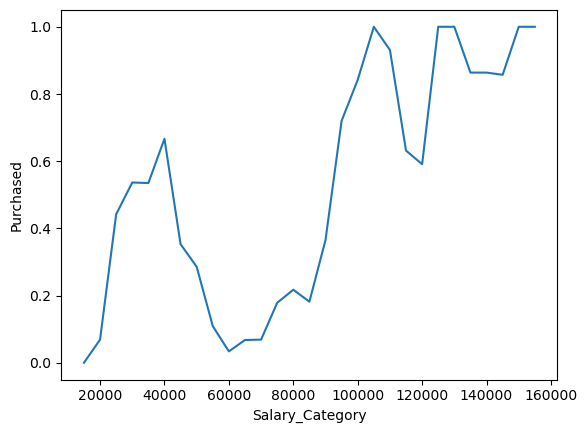

In [63]:
# 5000을 기준으로 연봉을 나눈다.
bins = [i for i in range(10000, 160000, 5000)]
salary_category = [i for i in bins[1:]]

data['Salary_Category'] = pd.cut(data['AnnualSalary'], bins=bins, labels=salary_category)


G_data = data.groupby(['Salary_Category']).mean().reset_index()

sns.lineplot(x = 'Salary_Category', y = 'Purchased', data = G_data)

100000이상의 연봉이 구매확률이 높은 건 맞지만 100000이하의 연봉의 경우 오히려 연봉이 높을 수록 구매확률이 낮은 경향이 있다는 걸 발견 